In [2]:
#make torus model 

#make height scale height at planet
#depth free parameter
#column density fixed to maximum allowed so that 13.6eV photons still penetrate to the planet 

In [160]:
import numpy as np
import atomic_species as at
import scipy.integrate as sp_int
import scipy.special as sp_spec
import matplotlib.pyplot as plt

In [1]:
#we can calculate the number of neutral hydrogen as a function of number density of hydrogen

alphaA_LyA = 4.18e-13
mp = 1.67e-24 #g
G = 6.67e-8
kb = 1.38e-16
xs_phot = 6.3e-18 

def nHI(nH, gamma):
    nHI = nH * (1 + (gamma - np.sqrt(gamma**2 + 4 * alphaA_LyA * nH * gamma)) / (2 * alphaA_LyA * nH))
    return nHI

def ne(nH, gamma):
    return nH - nHI(nH, gamma)

def tau_phot(nH, gamma, D):
    return nHI(nH, gamma) * xs_phot * D

def nH(tau, gamma, D):
    return tau / (D * xs_phot) + np.sqrt((tau * gamma) / (alphaA_LyA * D * xs_phot))

In [4]:
class SimpleTorusMaker:
    def __init__(self, Ms, a, gamma, D, T):
        self.Ms = Ms
        self.a = a
        self.gamma = gamma
        self.D = D
        self.T = T
        
    def get_height(self):
        cs = np.sqrt(2 * kb * self.T / mp)
        H = np.sqrt(2 * cs**2 * self.a**3 / (G * self.Ms))
        
    def get_densityH(self):
        return nH(1, self.gamma, self.D)
    
    def Nc_species(self, spec2Hratio):
        return self.get_densityH() * spec2Hratio * self.D
    
    def tau_species(self, spec2Hratio, xs):
        return self.get_densityH() * spec2Hratio * xs * self.D
        
        
        
        
        
        

In [5]:
torus = SimpleTorusMaker(1.4 * 2 * 10**33, 0.02 * 1.5e13, 10**0, 10**12, 10**4)
torus.Nc_species(1) 

6.163869523641766e+20

In [6]:
Mg2 = at.atomic_species('Mg II')

In [7]:
Mg2.get_Eth()

(15.04, 3.2780000000000002e-18)

In [259]:
#timescales 
G = 6.67e-8
Msun = 1.989e33
au = 1.5e13
Rsun = 6.96e10
cs = 1e6
alphaA = 4.18e-13

def omega(Ms, a):

    return np.sqrt(G * Ms / a**3)

def h(Ms, a, cs):

    return np.sqrt(2) * cs / omega(Ms, a)

def t_visc(Ms, a, cs, alpha):

    return (a / h(Ms, a, cs))**2 * (1 / (alpha * omega(Ms, a)))

def t_orb(Ms, a):

    return 2 * np.pi / omega(Ms, a)


def t_visc2(Ms, a, cs, alpha):

    return (G * Ms)**(1/2) * a**(1/2) * cs**-2 * alpha**-1 / 2 


def t_visc_div_t_orb(M, a, cs, alpha):

    res = np.pi * G * M / (alpha * a * cs)
    
    return res

def t_recomb(n_e):

    return 1 / (n_e * alphaA)

    

In [263]:
t_recomb(1e7) / (60 * 60 * 24)

2.768917242601453

In [28]:
t_visc_div_t_orb(Msun, 0.03*1.5e13, 1e5, 1) / 1e8

92.61854965754212

3863283.415697067

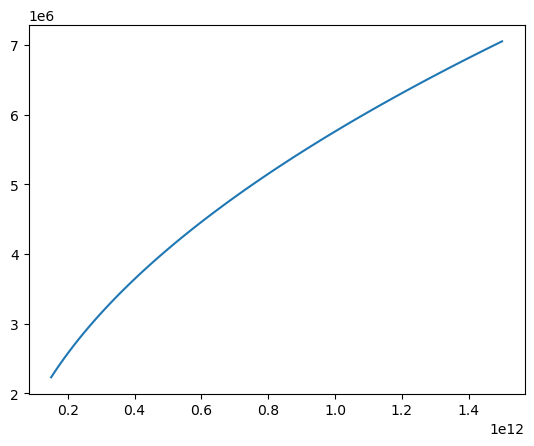

In [266]:
a = np.linspace(0.01*1.5e13, 0.1 * 1.5e13, 100)

plt.plot(a, t_visc(Msun, a, 1e6, 1))

t_visc(Msun, 0.03*1.5e13, 1e6, 1) 

In [45]:
t_visc2(Msun, 0.03*1.5e13, 1e6, 1) / (24 * 60 * 60)

44.713928422419755

In [39]:
t_orb(Msun, 0.03*1.5e13) / (60 * 60 * 24)

1.9059196516449528

In [267]:
(h(Msun, 3 * Rsun, 1e6) / Rsun)

0.16831436819073176

In [231]:
#everything in stellar radii

h_fac = G * Msun / Rsun / cs**2

def I(z1, C, rin, rout):

    def Ig1(r, z):

        return -C * r**-2 * np.exp(-h_fac * z**2 / r**3)

    def Int1(z):
        
        return 2 * np.exp(sp_int.quad(Ig1, rin, rout, args=z)[0]) * np.sqrt(1 - z**2)

    Int2 = sp_int.quad(Int1, -z1, z1)

    return (Int2[0] / np.pi) 

I_vec = np.vectorize(I)
    
    

In [269]:
10**-18 * 10**11 * 10**-4 / alphaA

23.92344497607656

Text(0.5, 0, 'z')

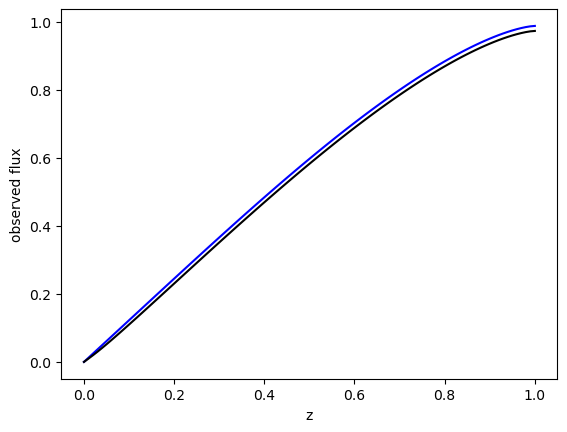

In [252]:
z = np.linspace(0, 1, 100)

plt.plot(z, I_vec(z, 10**-0.5, 4, 8), 'blue')
plt.plot(z, I_vec(z, 10**-0.5, 1, 8), 'black')

#plt.plot(z, I_vec(z, 10**-0.5))

#plt.plot(z, I_vec(z, 100), 'green')

#plt.plot(z, I_vec(z, 10**0, 4, 8), 'orange')
#plt.plot(z, I_vec(z, 10**0, 1, 8), 'yellow')


#plt.plot(z, sp_spec.erfc(z))

plt.ylabel('observed flux')
plt.xlabel('z')



In [221]:
h_fac

1906125000000000.0